In [2]:
print("Python běží!")

Python běží!


In [3]:
import sys

sys.path.append('../')
sys.path.append('../my_libs/')
sys.path.append('../my_libs/img/')

!{sys.executable} -m pip install -r ../../pip-dependencies.txt

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import my_libs as ml
from my_libs.tools import *
from my_libs.fft import *
from my_libs.colors import *
from my_libs.img.functional import *
from my_libs.img.processing import *
from my_libs.img.morphology import *

In [5]:
ml.tools.printf("Hello world!")

Hello world!

# Cvičení 5
1) Načtěte obrázek `pvi_cv05_mince_noise.png`. Obraz převeďte do stupňů 
šedi  a  složky  Hue.  Na  základě  histogramu  stanovte  práh  a  obrazy 
segmentujte.  V  jednom  okně  zobrazte  převedené  obrazy,  histogramy  a 
výsledný segmentovaný obraz. 
 
2)  Pro  odstranění  binárního  šumu  použijte  vhodně  zvolenou  binární 
morfologickou transformaci a vhodně zvolený strukturní element. Výsledek 
zobrazte. 
 
3)  Pro  identifikaci  objektů  použijte  algoritmus  barvení  oblastí.  Výsledek 
zobrazte. 
 
4) Spočítejte těžiště jednotlivých oblastí a na příslušné souřadnice vepište do 
původního  obrazu  počet  obrazových  bodů  z  daného  objektu.  Výsledek 
analyzujte  a  navrhněte  klasifikátor,  který  objekty  klasifikuje  na  základě 
velikosti. (V obraze se nachází 2 desetikoruny, 2 pětikoruny, 9 dvoukorun a 1 
koruna). 
 
5) Výsledek z klasifikace zobrazte v původním barevném obrázku.  

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html 

```python
from scipy.ndimage import label 
BWlabel, ncc = label(BWop)
```

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
DEBUG = True

if DEBUG:
    for path in sys.path:
        print(path)

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/pytel/.local/lib/python3.12/site-packages
/usr/local/lib/python3.12/dist-packages
/usr/lib/python3/dist-packages
../
../my_libs/
../my_libs/img/


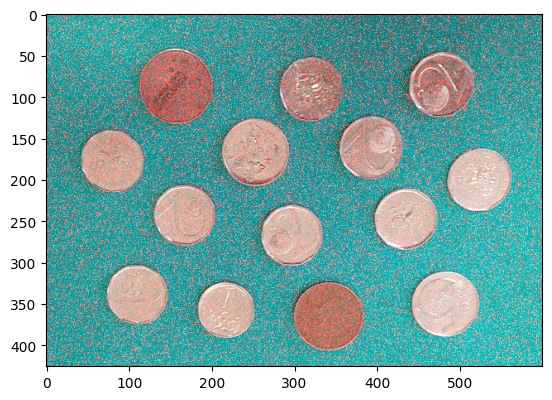

In [12]:
img_file_name = "pvi_cv05_mince_noise.png"
if not os.path.isfile(img_file_name):
    raise FileNotFoundError(
        Red + "File:", Blue +
        str(img_file_name), Red + "not found!" + NC)

# Load image:
img = cv2.imread(img_file_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image:
plt.imshow(img)

Načtěte obrázek `pvi_cv05_mince_noise.png`. Obraz převeďte do stupňů šedi a složky  Hue.  Na  základě  histogramu  stanovte  práh  a  obrazy 
segmentujte. V jednom okně zobrazte převedené obrazy, histogramy a výsledný segmentovaný obraz. 

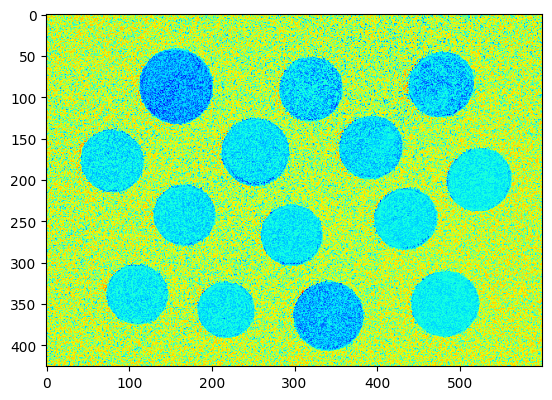

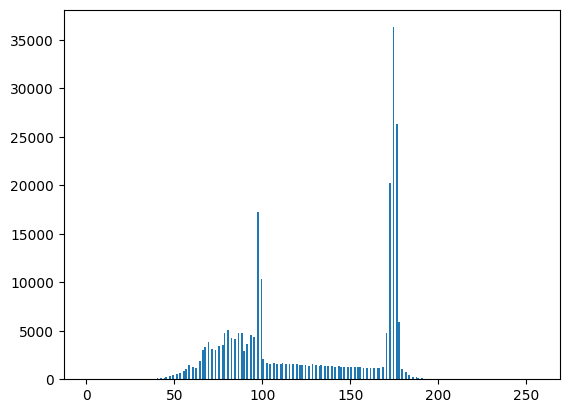

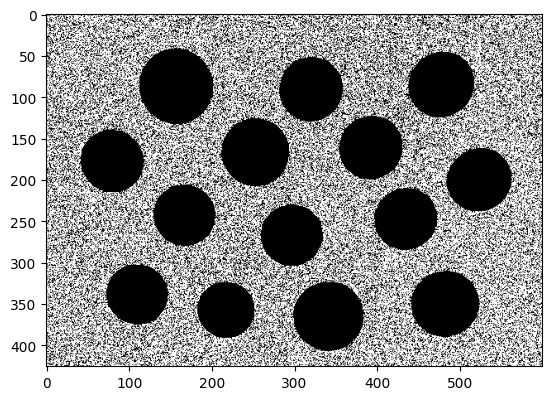

In [14]:
# convert to g:
g_color_space = img_to_g(img)
g_color_space = normalize(g_color_space)

# Show image:
plt.figure("Image")
plt.imshow(g_color_space, cmap='jet')

# Histogram:
plt.figure("Histogram")
plt.hist(g_color_space.ravel(), bins=256, range=(0, 256))

# Na základě analýzy histogramu byl vybrán prah T
T = 125

# Segmentate image:
g_color_space = segmentate(g_color_space, T, 255)
plt.figure("Segmentated image")
plt.imshow(g_color_space, cmap='gray')

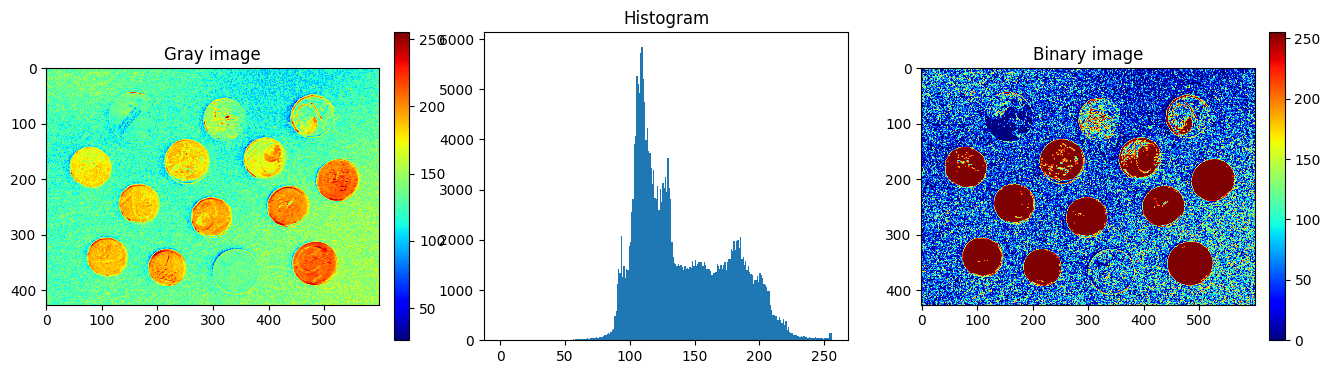

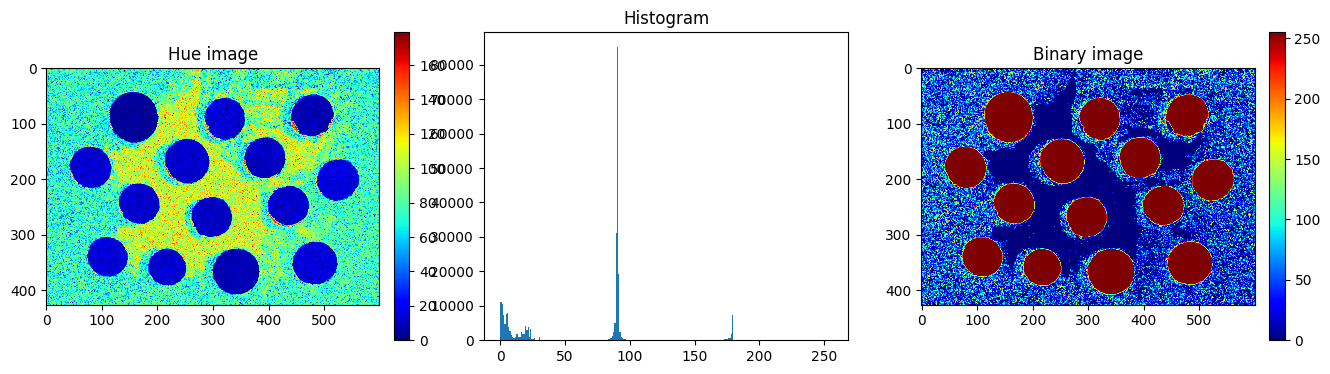

In [27]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2HSV))
img_H = H

def plot_segmentation(img, title:str="Gray image", T:int = 125, invert:bool = False):
    plot_imgs(
        imgs=[img, img, segmentate(img, T, 255, invert=invert)], 
        titles=[title, "Histogram", "Binary image"], 
        rows=1, cmaps=['jet', None, 'jet'], 
        cbars=[True, None, True],
        hist=[None, True, None],
        figsize=(16, 4))

T = 150
plot_segmentation(img_gray, "Gray image", T)
T = 75
plot_segmentation(img_H, "Hue image", T, True)
    

Pro  odstranění  binárního  šumu  použijte  vhodně  zvolenou  binární morfologickou transformaci a vhodně zvolený strukturní element. Výsledek zobrazte. 

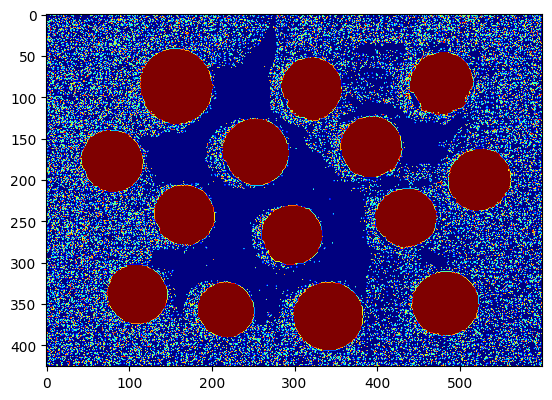

In [26]:
img_H_segmented = segmentate(img_H, T, 255, invert=True)

# Show image:
plt.figure("Segmentated image")
plt.imshow(img_H_segmented, cmap='jet')

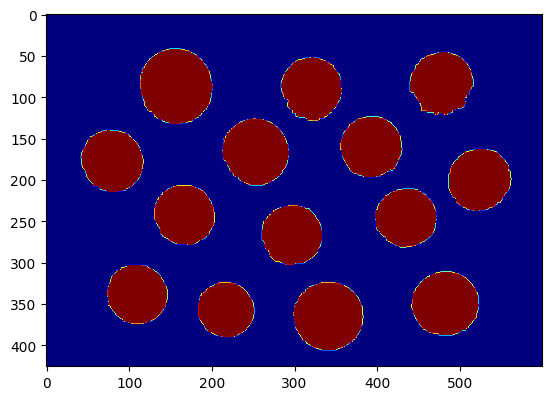

In [36]:
# opening
kernel = np.ones((3, 3), np.uint8)
img_H_segmented = cv2.morphologyEx(img_H_segmented, cv2.MORPH_OPEN, kernel)
#img_H_segmented = ml.img.morphology.morphology(img_H_segmented, kernel, ml.img.morphology.MorphologyOperation.GRAY_OPEN)

# Show image:
plt.figure("Segmentated image")
plt.imshow(img_H_segmented, cmap='jet')

Pro  identifikaci  objektů  použijte  algoritmus  barvení  oblastí.  Výsledek zobrazte.

Numbers: [1, 5, 13, 26, 28, 41, 54, 62, 67, 78, 90, 95, 103, 104]
Object color: 1
 - Center: 87 , 157
 - Area: 6295
Object color: 5
 - Center: 83 , 478
 - Area: 4429
Object color: 13
 - Center: 90 , 321
 - Area: 4318
Object color: 26
 - Center: 160 , 393
 - Area: 4304
Object color: 28
 - Center: 166 , 253
 - Area: 5017
Object color: 41
 - Center: 177 , 79
 - Area: 4386
Object color: 54
 - Center: 200 , 523
 - Area: 4454
Object color: 62
 - Center: 243 , 167
 - Area: 4166
Object color: 67
 - Center: 246 , 435
 - Area: 4119
Object color: 78
 - Center: 267 , 297
 - Area: 4157
Object color: 90
 - Center: 338 , 109
 - Area: 4109
Object color: 95
 - Center: 350 , 482
 - Area: 4931
Object color: 103
 - Center: 357 , 217
 - Area: 3563
Object color: 104
 - Center: 365 , 341
 - Area: 5484


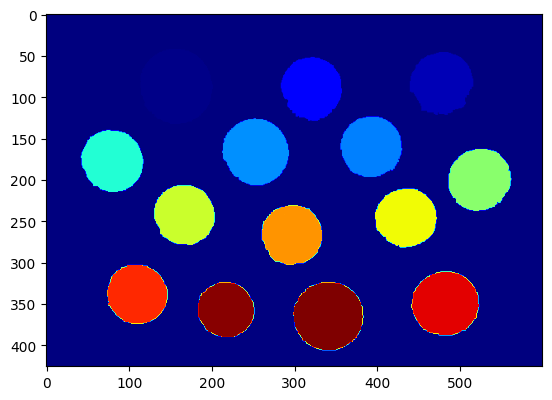

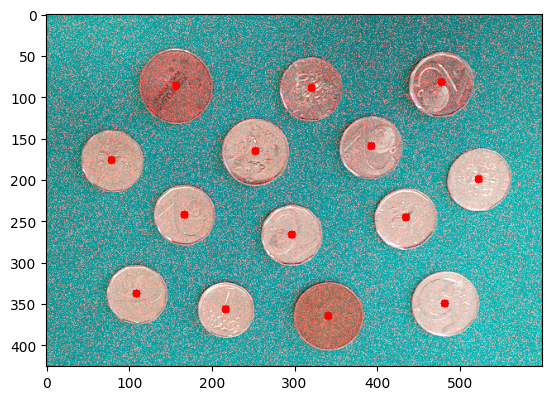

In [38]:
img_for_coloring = img_H_segmented

# invert image
img_for_coloring = cv2.bitwise_not(img_for_coloring)

# Colored objects:
colored, numbers = color_objects(img_for_coloring)
print("Numbers:", numbers)
plt.figure("Colored objects")
#plt.imshow(colored, cmap='jet')
plt.imshow(colored)
# Calculate centers:
centers = calculate_centers_of_objects(colored, numbers)

# Draw centers:
img_centers = img.copy()
for key in centers:
    print(Green + "Object color:", Blue + str(key) + NC)
    x, y = int(centers[key][0]), int(centers[key][1])
    area = centers[key][2]
    print(" - Center:", Blue + str(x) + NC, ",", Blue + str(y) + NC)
    print(" - Area:", Blue + str(area) + NC)

    center = (y, x)
    cv2.circle(img_centers, center, 5, (255, 0, 0), -1)

plt.figure("Image with centers")
plt.imshow(img_centers)
plt.show(block=False)

Spočítejte těžiště jednotlivých oblastí a na příslušné souřadnice vepište do původního  obrazu  počet  obrazových  bodů  z  daného  objektu.  Výsledek analyzujte  a  navrhněte  klasifikátor,  který  objekty  klasifikuje  na  základě velikosti. (V obraze se nachází 2 desetikoruny, 2 pětikoruny, 9 dvoukorun a 1 koruna). 

In [42]:
coins_dict = {
    1: 3500,
    2: 4100,
    5: 5000,
    10: 5500,
}

def clasify_coin(coins:dict, area:int):
    # vector of coins from dictionary:
    coins_vector = np.array(list(coins.values()))
    # take the closest coin:
    # get the key:
    coin = list(coins.keys())[np.argmin(np.abs(coins_vector - area))]
    return coin

# Detect objects:
coins = []
coords = []

for key in centers:
    # detect coins:
    coin = clasify_coin(coins_dict, centers[key][2])
    coins.append(coin)
    coords.append((centers[key][0], centers[key][1]))

# Print results:
for i in range(len(coins)):
    x, y = coords[i]
    print("Na souřadnici těžiště", int(x), ",", int(y), "se nachází:", coins[i])

Na souřadnici těžiště 87 , 157 se nachází: 10
Na souřadnici těžiště 83 , 478 se nachází: 2
Na souřadnici těžiště 90 , 321 se nachází: 2
Na souřadnici těžiště 160 , 393 se nachází: 2
Na souřadnici těžiště 166 , 253 se nachází: 5
Na souřadnici těžiště 177 , 79 se nachází: 2
Na souřadnici těžiště 200 , 523 se nachází: 2
Na souřadnici těžiště 243 , 167 se nachází: 2
Na souřadnici těžiště 246 , 435 se nachází: 2
Na souřadnici těžiště 267 , 297 se nachází: 2
Na souřadnici těžiště 338 , 109 se nachází: 2
Na souřadnici těžiště 350 , 482 se nachází: 5
Na souřadnici těžiště 357 , 217 se nachází: 1
Na souřadnici těžiště 365 , 341 se nachází: 10


Výsledek z klasifikace zobrazte v původním barevném obrázku. 

Text(0.5, 1.0, 'Values')

<Figure size 640x480 with 0 Axes>

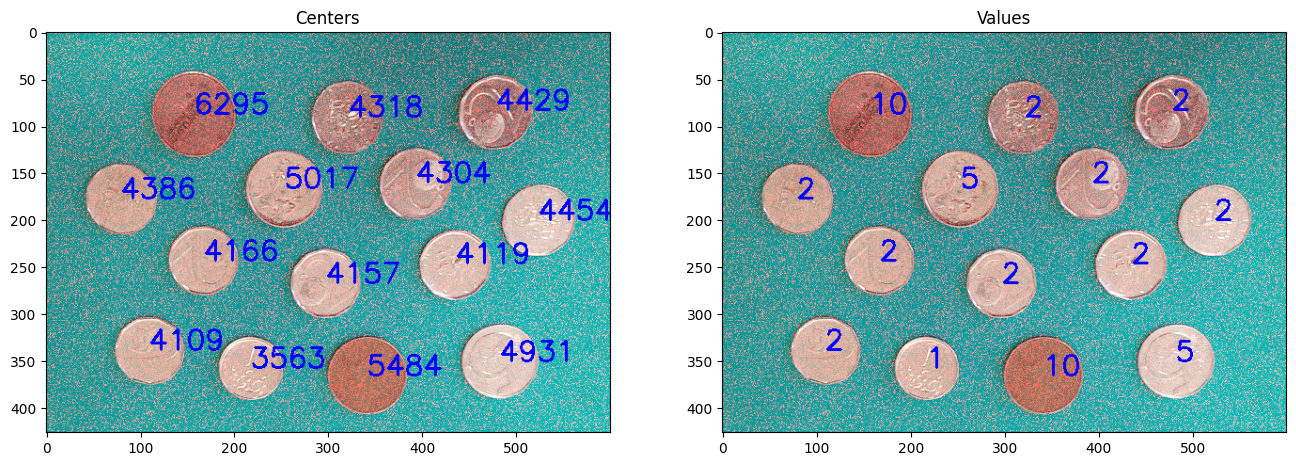

In [46]:
# Draw clasification to centers:
img_centers_value = img.copy()
img_centers_area = img.copy()
for key in centers:
    x, y = int(centers[key][0]), int(centers[key][1])
    area = centers[key][2]

    center = (y, x)
    #cv2.circle(img_centers, center, 5, (255, 0, 0), -1)
    cv2.putText(img_centers_value, str(clasify_coin(coins_dict, area)), center, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.putText(img_centers_area, str(area), center, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# two images:
plt.figure("Image with values")
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_centers_area)
plt.title("Centers")

plt.subplot(1, 2, 2)
plt.imshow(img_centers_value)
plt.title("Values")